<a href="https://colab.research.google.com/github/Sushen28/ML_Projects/blob/main/NLP_Text_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying News Articles using Naive Bayes

### **1. Create Dataset**

In [ ]:
# to avoid NumPy's truncation of outputs when certain code blocks are generated
import sys
import numpy

numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
import pandas as pd
import seaborn as sns
import os

# Read data frame
df = pd.read_csv('bbc-text.csv')

# Description of the dataset
df.shape
categories = df['category'].unique()
print(categories)
df.head()

['tech' 'business' 'sport' 'entertainment' 'politics']


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


### Prepare dataset
   Split dataset into train data and test data using ```sklearn.model_selection.train_test_split()```.
   
   Set ```random_state``` parameter value to **237** to ensure reproducible results.
   
   Use ```pandas.DataFrame.shape``` to print the sizes of the train and test sets after splitting the data
    

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd


# Train-test split and vectorize
X_train, X_test, y_train, y_test = train_test_split(df, df['category'], random_state = 237,stratify=df['category'], test_size=0.3, shuffle=True)

print("TRAIN DATASET: ",X_train.shape[0])

print("TEST DATASET:",X_test.shape[0])

TRAIN DATASET:  1557
TEST DATASET: 668


### **2. Feature Extraction - Preparing  Inputs**

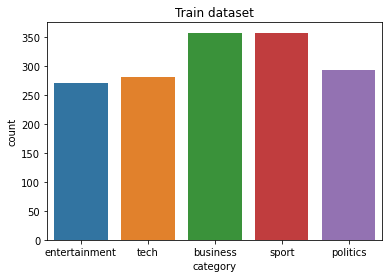

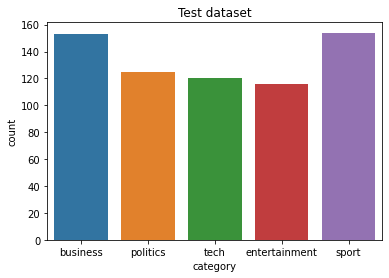

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x = X_train['category'])
plt.title("Train dataset")
plt.show()
sns.countplot(x = X_test['category'])
plt.title("Test dataset")
plt.show()


### **3. Prepare Outputs/Labels**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize #normalize every feature

text_vectorizer = CountVectorizer()
train_text_ohe = text_vectorizer.fit_transform(X_train['text'])
train_text_features = text_vectorizer.get_feature_names_out()
train_text_fea_counts = train_text_ohe.sum(axis=0).A1

text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

print("Total Number of Unique Words in Train Data :",len(train_text_features))



train_text_ohe = normalize(train_text_ohe, axis=0)

#we use the same vectorizer that was trained on train data
test_text_ohe = text_vectorizer.transform(X_test['text'])

#don't forget to normalize every feature
test_text_ohe = normalize(test_text_ohe, axis=0)

Total Number of Unique Words in Train Data : 25457


### **4. Model Training and Evaluation**
Train the model using the training set. Once the model is trained, apply the model on the test set and evalaute the performance of the model by calculating accuracy and generating the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss

clf = MultinomialNB()
clf.fit(train_text_ohe, y_train)
model_clf = CalibratedClassifierCV(clf, method="sigmoid")
model_clf.fit(train_text_ohe, y_train)
predict_y = model_clf.predict_proba(train_text_ohe)

print("The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = model_clf.predict_proba(test_text_ohe)

print("The cross validation log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predicted_y = model_clf.predict(test_text_ohe)
train_accuracy = (model_clf.score(train_text_ohe, y_train)*100)
test_accuracy = (accuracy_score(predicted_y, y_test)*100)

print("\n Accuracy Score")
print("Model Train Accuracy -",train_accuracy)
print("Model Test Accuracy -",test_accuracy)


The train log loss is: 0.04079024990954349
The cross validation log loss is: 0.1852753776042579

 Accuracy Score
Model Train Accuracy - 99.93577392421324
Model Test Accuracy - 95.80838323353294


### **Establishing a baseline model**

Baseline models are helpful for easy comparison of the models you build. These models are trained using simple heuristics or rules.

In [ ]:
# Baselines are simple heuristics to make predictions for a given task
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
# choose 'most-frequent class' as the baseline method
baseline_model = DummyClassifier(strategy="most_frequent")

# fit the baseline model on the training data
baseline_model.fit(X_train, y_train)

# make predictions on the test data using the created baseline model
baseline_preds = baseline_model.predict(X_test)

# compute the accuracy of the baseline model
print(accuracy_score(y_test, baseline_preds))

0.22904191616766467
